In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Epi= "sars" # sars, covid, H1N1

# Read the CSV file into a NumPy array
epiOData = np.genfromtxt(f'empirical_data/infected_numbers_{Epi}.csv', delimiter=',', skip_header= 0)
popData = np.genfromtxt('empirical_data/populations.csv', delimiter=',', skip_header= 0)
# Replace 'file_path.csv' with the path to your CSV file
file_path = 'empirical_data/Country_Population_final.csv'
# Read the CSV file
data = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
popName= data["Country"].tolist()
start= 1
endIdx= 40
requireNum= 60
print(epiOData.shape)
epiOData = epiOData[start:start+endIdx,1:]
epiODataNew= np.zeros((requireNum,epiOData.shape[1]))
epiODataNew[requireNum-epiOData.shape[0]:, :]= epiOData.copy()
epiOData = epiODataNew

epiData= epiOData.copy()/popData[None, :]
epiNewData = epiData.copy()
epiNewData[1:, :] = epiNewData[1:, :]-epiNewData[:-1, :]
print(np.sum(epiNewData<0))
epiNewData[epiNewData<0]= 0
sumEpiData= np.sum(epiOData, axis= 0)
ranked_indices = np.argsort(sumEpiData)
# print(ranked_indices)
print(np.sum(epiOData, axis= 1))
print(epiData.shape)
print(epiOData.shape)


(97, 235)
29
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.  167.  219.  264.  306.
  350.  386.  456.  487. 1323. 1408. 1485. 1550. 1622. 1804. 2223. 2270.
 2353. 2416. 2601. 2671. 2722. 2781. 2890. 2961. 3169. 3235. 3293. 3389.
 3547. 3547. 3861. 3947. 4288. 4435. 4645. 4832. 5046. 5458. 5659. 5861.]
(60, 234)
(60, 234)


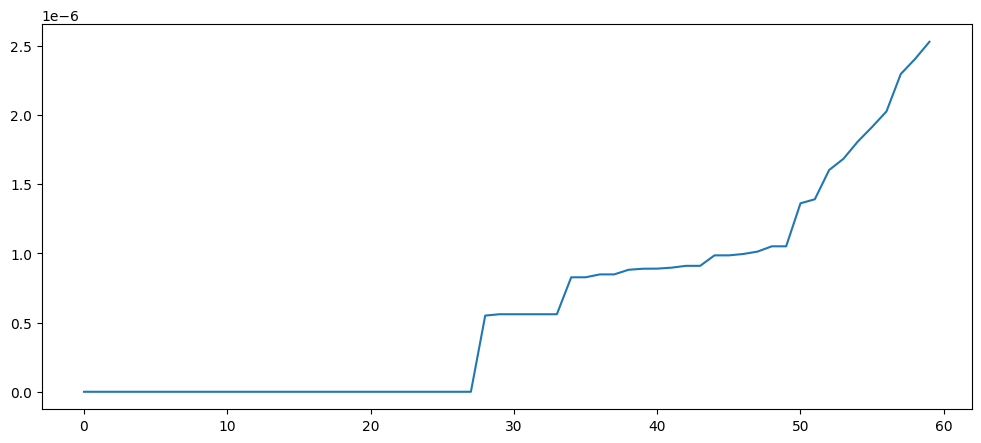

In [3]:
lastUsed= 100 # 34, 20, 21, 
plt.figure(figsize=(12, 5))
plt.plot(epiData[: , ranked_indices[-1]])

In [4]:
print([popName[i] for i in ranked_indices[-lastUsed: ]])

['Congo (Brazzaville)', 'Greenland', 'Iceland', 'Algeria', 'Benin', 'Burkina Faso', 'Ghana', "Cote d'Ivoire", 'Nigeria', 'Niger', 'Tunisia', 'Togo', 'Estonia', 'Finland', 'Guernsey', 'Jersey', 'Isle of Man', 'Falkland Islands', 'Netherlands', 'Denmark', 'Faroe Islands', 'Luxembourg', 'Norway', 'Botswana', 'Liberia', 'Morocco', 'Seychelles', 'Mauritania', 'Hungary', 'Senegal', 'Czech Republic', 'Israel', 'Malta', 'Austria', 'Portugal', 'Bosnia and Herzegovina', 'Turkey', 'Greece', 'Moldova', 'Gibraltar', 'Serbia', 'Montenegro', 'Slovakia', 'Turks and Caicos Islands', 'Dominican Republic', 'Guatemala', 'Honduras', 'Jamaica', 'Macedonia', 'Saint Pierre and Miquelon', 'Wake Island', 'Libya', 'Croatia', 'South Sudan', 'Tanzania', 'Uganda', 'Kenya', 'Rwanda', 'Egypt', 'Sudan', 'Burundi', 'Albania', 'Ethiopia', 'Cape Verde', 'Guinea', 'Cyprus', 'Somalia', 'Poland', 'Macau', 'South Korea', 'Belgium', 'Slovenia', 'Bulgaria', 'India', 'Indonesia', 'South Africa', 'Kuwait', 'Australia', 'Spain', 

In [5]:
print(ranked_indices[-lastUsed: ])
testEpiData= epiOData[:, ranked_indices[-lastUsed: ]]
testPopData= popData[ranked_indices[-lastUsed: ]]
print(testEpiData.shape)
print(testPopData.shape)
np.savetxt(f'testData/{Epi}_test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{Epi}_test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/{Epi}_test_pop_inx.csv', ranked_indices[-lastUsed: ], delimiter=',', fmt='%d')

[ 32   1   2   4   5   6   7   8   9  10  11  12  15  16  18  19  20  21
  22  24  25  26  27  31  59  60  50  62  83  61  86  87  88  89  90  91
  94  82  95  97  98  99 100 101 102 103 104 105  96  81 233  70  79  73
  74  75  69  71  68  72  66  76  65  64  63  78  67  28 195 148  13  85
  77 189 202  30 132 207  57 149  29  92 147  23 151 212  93 203  80  84
  17  14 199 146 200   3 213 206 193 210]
(60, 100)
(100,)
